In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
data = pd.read_csv('Sales Data.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
#descriptive statistics of the data
print(data.describe())

          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [ ]:
#removing null values
data = data.dropna()
print(data)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each        Order Date                        Purchase Address  \
0          1700.00  30-12-2019 

In [ ]:
#percentage sales by product type
sales_data = data.groupby('Product')['Quantity Ordered'].sum().reset_index()

pie_chart= px.pie(sales_data,
                  values='Quantity Ordered',
                  names='Product',
                  title='Percentage Sales by Product Type',
                  hole=0.3,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

From the above pie diagram we can see that the products relationg to mobile and laptop are sold the most. Especially batteries and chargers.

[Text(0.5, 1.0, 'Top 5 cities with most sales')]

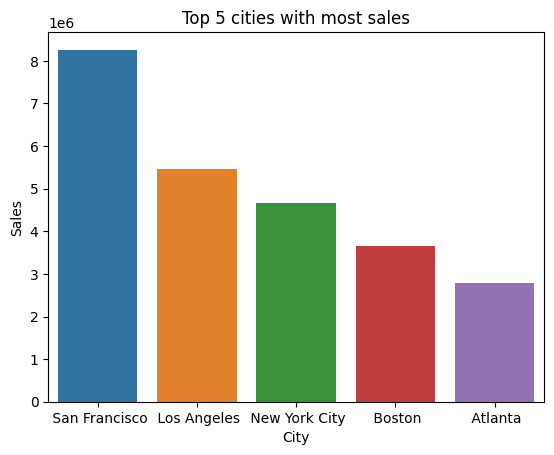

In [ ]:
#top 5 cities with most sales
import seaborn as sns
city_sales = data.groupby('City')['Sales'].sum().nlargest(5)
sns.barplot(x=city_sales.index,y=city_sales).set(title='Top 5 cities with most sales')

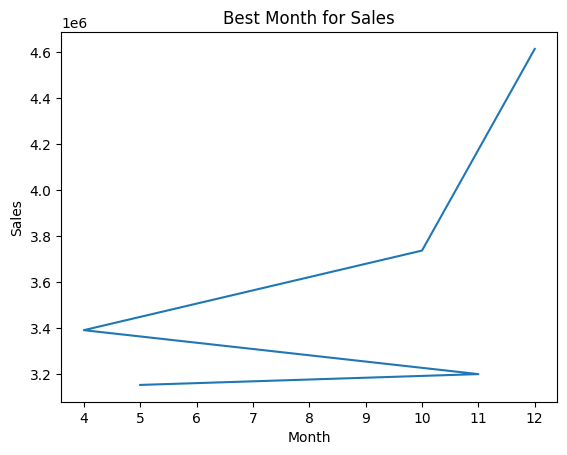

In [ ]:
#best month for sales
import matplotlib.pyplot as plt
best_month = data.groupby('Month')['Sales'].sum().nlargest()
plt.plot(best_month.index, best_month.values)
plt.title('Best Month for Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
#monthly sales group
monthly_sales = data.groupby('Month')['Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<ipython-input-9-c338ef64dcea>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



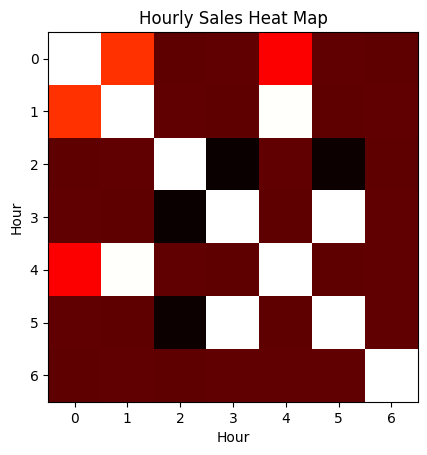

In [ ]:
#sales by hours
plt.imshow(data.corr(), cmap='hot', interpolation='nearest')
plt.title('Hourly Sales Heat Map')
plt.xlabel('Hour')
plt.ylabel('Hour')
plt.show()